In [6]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

### Read in School Datasets

*One dataset per school district for the year 2015

In [196]:
import pandas as pd
import numpy as np


# Read Discipline HS Files and store into seperate Pandas dataframes
df_FF_hs = pd.read_csv('ff_hs_disc_2015.csv')
df_R_hs = pd.read_csv('rockwood_hs_disc_2015.csv')
df_P_hs = pd.read_csv('parkway_hs_disc_2015.csv')
df_STL_hs = pd.read_csv('stl_hs_disc_2015.csv')

# Read Discipline MS Files for later study
# df_FF_ms = pd.read_csv('ff_middle_disc_2015.csv')
# df_R_ms = pd.read_csv('rockwood_middle_disc_2015.csv')
# df_P_ms = pd.read_csv('parkway_middle_disc_2015.csv')
# df_STL_ms = pd.read_csv('stl_middle_disc_2015.csv')

# #discipline_csv_list = ['Ferg_Flor_HS_Disc_SWD_SWOD.csv', 'Rockwood_HS_Disc_SWD_SWOD.csv', 'Parkway_HS_Disc_SWD_SWOD.csv', 'STL_HS_Disc_SWD_SWOD.csv']

# df = []
# for item in i :
#     df.append(df_FF, df_R, df_P, df_STL)

# create an addiitonal Pandas dataframe of all schools together
df_all_hs = pd.concat([df_FF_hs, df_R_hs, df_P_hs, df_STL_hs])
# df_all_ms = pd.concat([df_FF_ms, df_R_ms, df_P_ms, df_STL_ms])

#want to turn the seperate race columns into one column with all races

df_hs = df_all_hs.melt(id_vars=['Lea State', 'LEA', 'School State', 'School', 'ID', 'Year', 'Category',
       'Sex', 'Total (IDEA)', 'SWD (Section 504 only)', 'Total',
       'LEP'], 
        var_name="Race", 
                 
        value_name="Count")

df_hs = df_hs.rename(columns={"Total (IDEA)": "Total_Disability", "SWD (Section 504 only)": "no_IEP"})

df_hs = df_hs.drop(columns = ['Lea State','ID'])

df_hs.tail(5)


,LEA,School State,School,Year,Category,Sex,Total_Disability,no_IEP,Total,LEP,Race,Count
7933,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,SWOD: Referral to law enforcement,F,NaN,NaN,2.0,0.0,Two or more races,0.0
7934,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,SWOD: School-related arrest,M,NaN,NaN,2.0,0.0,Two or more races,0.0
7935,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,SWOD: School-related arrest,F,NaN,NaN,2.0,0.0,Two or more races,0.0
7936,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,Total enrollment,M,NaN,NaN,271.0,71.0,Two or more races,0.0
7937,ST. LOUIS CITY,MO,BEAUMONT CTE HIGH SCHOOL,2015,Total enrollment,F,NaN,NaN,215.0,53.0,Two or more races,0.0


In [152]:
# Convert each column of interest to an np.array

school = df_hs.School.to_numpy()
district = df_hs.LEA.to_numpy()
year = df_hs.Year.to_numpy()
category = df_hs.Category.to_numpy()
sex = df_hs.Sex.to_numpy()
race = df_hs.Race.to_numpy()
all_dis = df_hs.Total_Disability.to_numpy()
no_IEP = df_hs.no_IEP.to_numpy()
Total = df_hs.Total.to_numpy()

## Schools Information

- How many schools are in the dataset?

- How many school districts in the dataset?


In [104]:
num_counts_schools = len(df_hs['School'].unique())
num_counts_districts = len(df_hs['LEA'].unique())
num_counts_both = [{"Number of Schools": num_counts_schools, "Number of Districts": num_counts_districts}]
df_num_counts = pd.DataFrame(num_counts_both)
df_num_counts

,Number of Schools,Number of Districts
0,27,4


## Total Number of Students per school

- How many students are enrolled in each school?

In [147]:
# Drop total row to do race analysis
# Find row 'Total' index

total_rows = df_hs.loc[df_hs['Category']=='Total enrollment']
total_rows_df = pd.DataFrame(total_rows)


# How many students enrolled in each school?

total_df = total_rows_df.groupby('LEA')['Count'].agg([np.sum])
total_df = total_df.rename(columns= {'sum':'Total Students'})

total_df
# total_rows_df.head(5)

,Total Students
LEA,
FERGUSON-FLORISSANT R-II,3353.0
PARKWAY C-2,5524.0
ROCKWOOD R-VI,7290.0
ST. LOUIS CITY,6751.0


## Sex Demographics

- Counts of male and female students in each school

In [129]:

sex_df = total_rows_df.groupby(['LEA','Sex'])['Count'].agg([np.sum])
sex_df = sex_df.rename(columns = {'sum': 'Total Students'})

sex_percent = sex_df.groupby(['LEA'])['Total Students'].agg([np.sum])
sex_percent

sex_percent_df = sex_df.append(sex_percent)
sex_percent_df

sex_df

Total Students
LEA                      Sex                
FERGUSON-FLORISSANT R-II F            1720.0
                         M            1633.0
PARKWAY C-2              F            2714.0
                         M            2810.0
ROCKWOOD R-VI            F            3605.0
                         M            3685.0
ST. LOUIS CITY           F            3395.0
                         M            3356.0

## Racial Demographics

- Racial Demographic of each district

In [81]:
# hs_race_counts_df = pd.pivot_table(total_rows_df, values= 'Count', index=['Race'],
#                      columns=['School', 'Category'], aggfunc= np.sum, fill_value = 0)
hs_race_counts_df = pd.pivot_table(total_rows_df, values= 'Count', index=['Race'],
                     columns=['LEA'], aggfunc= np.sum, fill_value = 0)
# hs_rc

hs_race_counts_df = hs_race_counts_df.rename(columns={"FERGUSON-FLORISSANT R-II": "Ferguson_Florissant", "PARKWAY C-2": "Parkway", "ROCKWOOD R-VI": "Rockwood","ST. LOUIS CITY": "STL_City"})

hs_race_counts_df

LEA,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,6,8,14,26
Asian,16,538,427,239
Black,2757,869,724,5336
Hawaiian/ Pacific Islander,4,6,8,0
Hispanic,75,238,229,306
Two or more races,114,203,115,0
White,381,3662,5773,844


- Percentage breakdown of race for each district

In [88]:
# Sum of all columns from race demographic counts
# print(hs_race_counts_df['Ferguson_Florissant'].sum())
# print(hs_race_counts_df['Parkway'].sum())
# print(hs_race_counts_df['Rockwood'].sum())
# print(hs_race_counts_df['STL_City'].sum())

FF_perc = pd.DataFrame(hs_race_counts_df['Ferguson_Florissant'].div(3353))*100
Park_perc = pd.DataFrame(hs_race_counts_df['Parkway'].div(5524))*100
Rockwood_perc = pd.DataFrame(hs_race_counts_df['Rockwood'].div(7290))*100
STL_perc = pd.DataFrame(hs_race_counts_df['STL_City'].div(6751))*100

race_percent_df = pd.concat([FF_perc, Park_perc, Rockwood_perc, STL_perc], axis=1).reindex(FF_perc.index)
race_percent_df = pd.DataFrame(race_percent_df)
race_percent_df

# Check math to make sure all columns = 100
# print(race_percent_df['Ferguson_Florissant'].sum())
# print(race_percent_df['Parkway'].sum())
# print(race_percent_df['Rockwood'].sum())
# print(race_percent_df['STL_City'].sum())


# # format the rows
format_race_df = {"Ferguson_Florissant":'{:0,.2f}%', 'Parkway': '{:0,.2f}%', 'Rockwood':'{:0,.2f}%', 'STL_City': '{:0,.2f}%'}
race_percent_df.style.format(format_race_df)



,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,0.18%,0.14%,0.19%,0.39%
Asian,0.48%,9.74%,5.86%,3.54%
Black,82.22%,15.73%,9.93%,79.04%
Hawaiian/ Pacific Islander,0.12%,0.11%,0.11%,0.00%
Hispanic,2.24%,4.31%,3.14%,4.53%
Two or more races,3.40%,3.67%,1.58%,0.00%
White,11.36%,66.29%,79.19%,12.50%


## Total Students Disciplined in school

Amount of students who recieve any discipline in school

In [158]:
# drop Total enrollment rows from dataframe for disciplined students

# index total enrollment rows and then drop them.

total_rows_index = total_rows = df_hs.loc[df_hs['Category']=='Total enrollment'].index
total_discipline_df = df_hs.drop(total_rows_index)
total_discipline_df.head(5)

total_discipline_count_df = total_discipline_df.groupby('LEA')['Count'].agg([np.sum])
discipline_count_df = total_discipline_count_df.rename(columns = {'sum': 'Total Disciplined Students'})
discipline_count_df


,Total Disciplined Students
LEA,
FERGUSON-FLORISSANT R-II,2691.0
PARKWAY C-2,540.0
ROCKWOOD R-VI,746.0
ST. LOUIS CITY,2390.0


## Discipline by Race

- number of students disciplined by race
- percent of students diciplined by race

In [209]:
disc_race_ct_df = total_discipline_df.groupby(['LEA', 'Race'])['Count'].agg([np.sum])

disc_race_ct_df
disc_race_ct_df = pd.pivot_table(disc_race_ct_df, values= 'sum', index=['Race'],
                       columns=['LEA'], fill_value = 0)
# # hs_rc

disc_race_ct_df = disc_race_ct_df.rename(columns={"FERGUSON-FLORISSANT R-II": "Ferguson_Florissant", "PARKWAY C-2": "Parkway", "ROCKWOOD R-VI": "Rockwood","ST. LOUIS CITY": "STL_City"})


LEA,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,8,0,0,6
Asian,4,22,12,16
Black,2441,242,309,2174
Hawaiian/ Pacific Islander,4,0,0,0
Hispanic,42,39,29,52
Two or more races,82,30,14,0
White,110,207,382,142


In [157]:
# Sum of all columns from race discipline counts
# print(disc_race_ct_df['Ferguson_Florissant'].sum())
# print(disc_race_ct_df['Parkway'].sum())
# print(disc_race_ct_df['Rockwood'].sum())
# print(disc_race_ct_df['STL_City'].sum())

disc_FF_perc = pd.DataFrame(disc_race_ct_df['Ferguson_Florissant'].div(2691))*100
disc_Park_perc = pd.DataFrame(disc_race_ct_df['Parkway'].div(540))*100
disc_Rockwood_perc = pd.DataFrame(disc_race_ct_df['Rockwood'].div(746))*100
disc_STL_perc = pd.DataFrame(disc_race_ct_df['STL_City'].div(2390))*100

disc_race_percent_df = pd.concat([disc_FF_perc, disc_Park_perc, disc_Rockwood_perc, disc_STL_perc], axis=1).reindex(disc_FF_perc.index)
disc_race_percent_df = pd.DataFrame(disc_race_percent_df)
disc_race_percent_df

#Check math to make sure all columns = 100
# print(race_percent_df['Ferguson_Florissant'].sum())
# print(race_percent_df['Parkway'].sum())
# print(race_percent_df['Rockwood'].sum())
# print(race_percent_df['STL_City'].sum())


# # format the rows
format_race_discipline = {"Ferguson_Florissant":'{:0,.2f}%', 'Parkway': '{:0,.2f}%', 'Rockwood':'{:0,.2f}%', 'STL_City': '{:0,.2f}%'}
disc_race_percent_df.style.format(format_race_discipline)

,Ferguson_Florissant,Parkway,Rockwood,STL_City
Race,,,,
American Indian or Alaska Native,0.30%,0.00%,0.00%,0.25%
Asian,0.15%,4.07%,1.61%,0.67%
Black,90.71%,44.81%,41.42%,90.96%
Hawaiian/ Pacific Islander,0.15%,0.00%,0.00%,0.00%
Hispanic,1.56%,7.22%,3.89%,2.18%
Two or more races,3.05%,5.56%,1.88%,0.00%
White,4.09%,38.33%,51.21%,5.94%


In [ ]:
# df_hs_clean = df_hs.drop(columns = ['Race','Count'])
df_hs_clean = df_hs['Category'].drop(('Total'), axis = 0)

#pivot tables to create discipline columns, SWD, SWOD

# ds_df = df.pivot(index= "Sex", columns=["School", "Category", "Race"], values="Count")


# hs_ds_rc_df = hs_ds_rc_df.drop(columns = ['Total Disability', '504 only', 'Total'])

hs_ds_sex_df = pd.pivot_table(df_hs, values= 'Total', index=['Sex'],
                              columns=['School', 'Category'], fill_value = 0)

hs_ds_db_df = df_hs.drop(columns = ['Race','Count'])

# hs_ds_db_df = pd.pivot_table(hs_ds_db_df, values = 'Total', index= ['School'],
#                             columns=['Category'], aggfunc = np., fill_value = 0)

#Rename the disability total IDEA and Section 504 column because it keeps giving me trouble when converting to NumPy array
#Rename the 'Total' column because it's vague about being a total of all students (SWD + SWOD)

# df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
# df.rename(columns={"A": "a", "B": "c"})

#help(df)
# print(ds_sex_df.columns)
# (ds_sex_df.head(10))
# (ds_sex_df.tail(10))
# (ds_rc_df.tail(10))


# (hs_ds_rc_df)

# (hs_ds_sex_df)

# # (hs_ds_db_df)

# (df_hs_clean)

## Data Visualization

- Stacked Bar graphs
    - Race by school district


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Ferguson_Florissant'),
  Text(1, 0, 'Parkway'),
  Text(2, 0, 'Rockwood'),
  Text(3, 0, 'STL_City')])

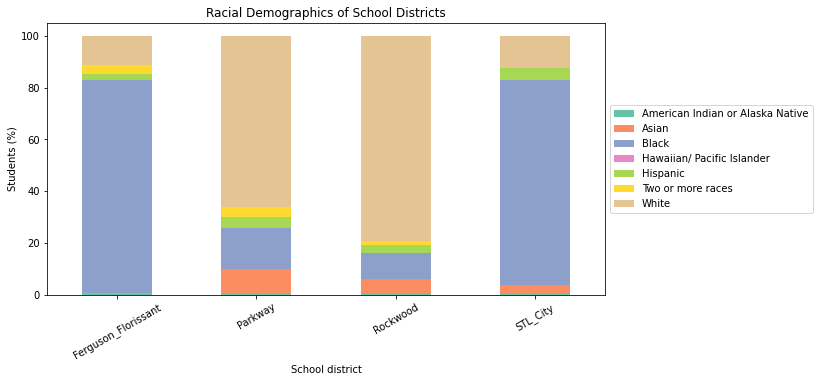

In [243]:
colors = sns.color_palette("Set2")
hs_race_counts_df.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked= True, figsize=(10,5), color =colors)
plt.title("Racial Demographics of School Districts")
plt.xlabel("School district")
plt.ylabel("Students (%)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30, horizontalalignment="center")